# **Diplomado IA: Aprendizaje Profundo I - Parte 1**. <br> Práctico 1: Redes Convolucionales
---
---

**Profesores:**
- Alain Raymond
- Miguel Fadic
- Álvaro Soto
- Cristóbal Eyzaguirre

**Ayudante:**
- Gabriel Molina
---
---

El siguiente práctico se debe realizar de forma individual. El formato de entregar es el **archivo .ipynb con todas las celdas ejecutadas**. Las secciones donde se planteen preguntas de forma explícita, deben ser respondida en celdas de texto, y no se aceptará solo el _output_ de una celda de código como respuesta.

**Nombre alumno:** Ariel Carvajal B.

El siguiente práctico contendrá 1 o más actividades a realizar. Algunas actividades corresponderán a escribir código y otras a responder preguntas. 

Antes de responder, se recomienda **fuertemente** revisar las secciones previas donde se desarrollan los ejemplos, dado que algunas de las actividades pueden ser completadas reutilizando el mismo código.

**Fecha de entrega:** jueves 16 de septiembre de 2021, 23:59 hrs.

---
**IMPORTANTE:** habrá un bonus de 1 décima para todos aquellos alumnos/as que muestren buen orden en sus respuestas (esto aplica a legibilidad de código, buena redacción, formalidad, organización del jupyter notebook, seguimiento de instrucciones, etc). El criterio lo pondrá cada ayudante corrector. La nota máxima obtenible en el laboratorio es 7.0

## Parte 1: Creando AlexNet

En la siguiente sección vamos a ver cómo traducimos todas esas piezas que vimos en la clase de Redes Convolucionales (filtros, *stride*, *padding*, etc.) en código práctico en Python.

Recordemos la estructura de AlexNet: 


![alt text](https://www.researchgate.net/profile/Sherif_Shehata2/publication/308880040/figure/fig3/AS:413548556636165@1475609067864/An-illustration-of-the-architecture-of-AlexNet-deep-convolutional-neural-network.png)

Algunos comentarios:

* Si no se menciona el stride en la capa, se asume que es de 1.
* Sólo hay Max Pooling en las capas que se indica. Si hay usa *stride* de 2 y kernel de (3,3).
* El *padding* por capa es:



>Capa | Padding
>--- | ---
>Conv1 | 2
>Conv2 | 2
>Conv3 | 1
>Conv4 | 1
>Conv5 | 1

¡Empecemos a armarlo!

In [70]:
import torch
import torch.nn as nn  # Esto es PyTorch y su módulo de Redes Neuronales


class AlexNet(nn.Module):  # Esta clase representa nuestro modelo
    def __init__(self):  # Constructor, aquí armamos las piezas de nuestra red
        super(AlexNet, self).__init__()
        # Bloques Convolucionales
        # Recordemos que los Bloques Convolucionales van a estar hechos de 3
        # elementos: Convolución, Pooling y Activación.
        # En este caso usaremos Convoluciones 2d, Max Pooling y ReLU

        # Input = 3x 224 x 224 Output = 96 x 55 x 55 --> Max Pool = 96 x 27 x 27
        self.conv1 = nn.Sequential(
            nn.Conv2d(  # Todo esto define a la Convolución
                in_channels=3,  # Filtros/Canales de Entrada (RGB)
                out_channels=96,  # Filtros/Canales de Salida
                kernel_size=(11, 11),  # Tamaño de la Convolución
                stride=(4, 4),  # Stride
                padding=(2, 2)),  # Cuántos pixeles de padding
            nn.MaxPool2d(kernel_size=(3, 3), stride=(2, 2)),  # Max Pooling
            nn.ReLU()  # Activación
        )

        # Input = 96 x 27 x 27 Output = 256 x 27 x 27 --> Max Pool = 256 x 13 x 13
        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=96,
                out_channels=256,
                kernel_size=(5, 5),
                stride=(1, 1),
                padding=(2, 2)),
            nn.MaxPool2d(kernel_size=(3, 3), stride=(2, 2)),
            nn.ReLU()
        )

        # Input = 256 x 13 x 13 Output = 384 x 13 x 13
        self.conv3 = nn.Sequential(
            nn.Conv2d(
                in_channels=256,
                out_channels=384,
                kernel_size=(3, 3),
                stride=(1, 1),
                padding=(1, 1)),
            nn.ReLU()
        )

        # Input = 384 x 13 x 13 Output = 384 x 13 x 13
        self.conv4 = nn.Sequential(
            nn.Conv2d(
                in_channels=384,
                out_channels=384,
                kernel_size=(3, 3),
                stride=(1, 1),
                padding=(1, 1)),
            nn.ReLU()
        )

        # Input = 384 x 13 x 13 Output = 256 x 13 x 13 --> MaxPool = 256 x 6 x 6
        self.conv5 = nn.Sequential(
            nn.Conv2d(
                in_channels=384,
                out_channels=256,
                kernel_size=(3, 3),
                stride=(1, 1),
                padding=(1, 1)),
            nn.MaxPool2d(kernel_size=(3, 3), stride=(2, 2)),
            nn.ReLU()
        )

        ##
        self.flat = nn.Flatten()  # Capa aplanamiento para poder vincular

        # resultado convolucional con capas lineales.
        # Bloques Fully Connected/MLP

        # Input = 256 x 6 x 6 = 9216 Output = 4096
        self.fc6 = nn.Sequential(
            nn.Linear(9216, 4096),
            nn.ReLU()
        )

        # Input = 4096 Output = 4096
        self.fc7 = nn.Sequential(
            nn.Linear(4096, 4096),
            nn.ReLU()
        )

        # Input = 4096 Output = 1000
        self.fc8 = nn.Sequential(
            nn.Linear(4096, 1000)
        )

    def forward(self, x):        # Aquí armamos cómo se conectan las piezas
        # Esta red es sencilla pues solo tenemos
        # que conectar las piezas una detrás de la
        # otra. No todas las redes son así.
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.flat(x)
        x = self.fc6(x)
        x = self.fc7(x)
        x = self.fc8(x)

        return x


### ¿Cómo saber cuál va a ser la dimensionalidad de la salida de una capa convolucional?

Esto suele ser un problema a la hora de armar una red convolucional, porque en algún momento (en particular al pasar a la sección fully connected de nuestra red) vamos a necesitar saber cuántas neuronas tiene nuestra red en un cierto punto. Por suerte, ¡existe una fórmula sencilla para calcularlo!

* Sean $H, W$ el alto y ancho de nuestra imagen o de nuestros features convolucionales.
* Sean $K_H, K_W$ los tamaños de los kernels asociados a $H$ y $W$.
* Sean $S_H, S_W$ el *stride* asociado a $H$ y $W$.
* Sea $P$ la cantidad de pixeles de padding.

Entonces la dimensión de las caraterísticas de salida sería:

$$O_H = \lfloor\frac{H - K_H + 2P}{S_H}\rfloor + 1$$

$$O_W =  \lfloor\frac{W - K_W + 2P}{S_W}\rfloor + 1$$

Por ejemplo para la primera capa de AlexNet tendríamos:

$$O_H = \lfloor \frac{224 - 11 + 2\cdot1}{4}\rfloor + 1 = 55 $$
$$O_W = \lfloor\frac{224 - 11 + 2\cdot1}{4}\rfloor + 1 = 55 $$

¡Que es justo lo que esperábamos!


In [71]:
# @title Calculadora de Dimensionalidad de Salida { run: "auto" }
from math import floor   # Para redondear hacia abajo

H = 64  # @param {type:"integer"}
W = 64  # @param {type:"integer"}
K = 11  # @param {type:"integer"}
S = 4  # @param {type:"integer"}
P = 2  # @param {type:"integer"}

output_H = floor((H - K + 2 * P) / S) + 1
output_W = floor((H - K + 2 * P) / S) + 1


def calculate_conv_output_size(width, heigth, kernel, stride, padding):
    # Ariel: voy a definir lo de arriba pero como funcion para usarlo luego
    return (
        floor((width - kernel + 2 * padding) / stride) + 1,
        floor((heigth - kernel + 2 * padding) / stride) + 1,
    )

def calculate_max_pool_output_size(width, heigth, kernel, stride):
    return (
        floor((width - kernel) / stride) + 1,
        floor((heigth - kernel) / stride) + 1,
    )

print("Nuestro dimensionalidad de output es: ({}, {}).".format(output_H, output_W))
print("Nuestro dimensionalidad de output es: ({}, {}).".format(
    *calculate_conv_output_size(H, W, K, S, P)
))
print("Nuestro dimensionalidad de output es: ({}, {}).".format(
    *calculate_max_pool_output_size(55, 55, 3, 2)
))


Nuestro dimensionalidad de output es: (15, 15).
Nuestro dimensionalidad de output es: (15, 15).
Nuestro dimensionalidad de output es: (27, 27).


### ¿Cómo calculamos la cantidad de neuronas a la salida de una capa convolucional?

La cantidad de neuronas es de: 

$$ C_{out} \cdot H \cdot W  $$


In [72]:
6*6*256

9216

In [73]:
# @title Calculadora de Neuronas { run: "auto" }
C_out = 256  # @param {type:"integer"}
H = 6  # @param {type:"integer"}
W = 6  # @param {type:"integer"}

neuronas = C_out*H*W


def calculate_neurons(C_out, width, heigth):
    return C_out * width * heigth


print("La cantidad de neuronas es de: {}.".format(neuronas))
print("La cantidad de neuronas es de: {}.".format(calculate_neurons(C_out, H, W)))


La cantidad de neuronas es de: 9216.
La cantidad de neuronas es de: 9216.


### ¿Cómo calculamos la cantidad de parámetros asociados a una capa convolucional?

* Sean $C_{in}$, $C_{out}$ los canales de entrada y salida de la capa.
* Sea $K_H$, $K_W$ los tamaños del kernel de la capa.
* $B$ es igual a $C_{out}$ en caso de usar *bias* en nuestra capa (lo más usual) y 0 en caso contrario.

Entonces, la cantidad de parámetros es de: 

$$ C_{in} \cdot C_{out} \cdot K_H \cdot K_W + B  $$


In [74]:
# @title Calculadora de Cantidad de Parámetros { run: "auto" }
# Aqui definimos características de una capa para calcular su número de parámetros
C_in = 3  # @param {type:"integer"}
C_out = 96  # @param {type:"integer"}
K_H = 11  # @param {type:"integer"}
K_W = 11  # @param {type:"integer"}
use_bias = True  # @param ["False", "True"] {type:"raw"}

if use_bias:
    bias = C_out
else:
    bias = 0

params = C_in * C_out * K_H * K_W + bias

def calculate_parameter_count(channels_in, channels_out, kernel, use_bias = True):
    return C_in * C_out * kernel ** 2 + (channels_out if use_bias else 0) 

print("La cantidad de parámetros es: {}.".format(params))
print("La cantidad de parámetros es: {}.".format(calculate_parameter_count(C_in, C_out, K_H, use_bias)))


La cantidad de parámetros es: 34944.
La cantidad de parámetros es: 34944.


In [75]:
def contar_parametros(modelo):
    contador = 0
    for nombre, modulo in modelo.named_children():
        params = sum(p.numel() for p in modulo.parameters() if p.requires_grad)
        print("Cantidad Parámetros Capa '{}': {}.".format(nombre, params))
        contador += params

    print("La cantidad total de parámetros es: {}.".format(contador))
    return contador


In [76]:
alex = AlexNet()
contar_parametros(alex)

Cantidad Parámetros Capa 'conv1': 34944.
Cantidad Parámetros Capa 'conv2': 614656.
Cantidad Parámetros Capa 'conv3': 885120.
Cantidad Parámetros Capa 'conv4': 1327488.
Cantidad Parámetros Capa 'conv5': 884992.
Cantidad Parámetros Capa 'flat': 0.
Cantidad Parámetros Capa 'fc6': 37752832.
Cantidad Parámetros Capa 'fc7': 16781312.
Cantidad Parámetros Capa 'fc8': 4097000.
La cantidad total de parámetros es: 62378344.


62378344

In [77]:
11*11*3*96

34848

### Probando la Red

Para verificar que la red funciona vamos a crear imágenes aleatorias y probaremos que se propaguen correctamente por la red. Si lanza un error, quiere decir que alguna de las capas que definimos no están entregando las dimensiones que esperábamos.

In [78]:
alex = AlexNet()  # Creamos una instancia de nuestra red
# Creamos un batch de 10 imágenes aleatorias
datos_random = torch.randn((10, 3, 224, 224)).float()
resultado = alex(datos_random)  # Metemos como input las imágenes a la red
print("El resultado tiene forma: ({}, {})".format(
    resultado.shape[0], resultado.shape[1]))


El resultado tiene forma: (10, 1000)


## Actividades

Si bien fácilmente podemos reutilizar AlexNet para trabajar con imágenes de tamaño distinto a 224x224 cambiando el tamaño de las imágenes, esto es muy costoso pues estamos entrenando más parámetros de los que necesitamos en caso de entrenar con imágenes más pequeñas. Por lo tanto, le vamos a pedir que:

1. Altere el modelo original para que trabaje en clasificación de 102 clases y no 1000. Llame a la clase de su modelo MiAlexNet.

2. Altere la definición de MiAlexNet anterior para que tome como input imágenes de 3 x 64 x 64. Para esto, deberá alterar las capas *conv1* y *conv2* manteniendo el resto iguales. Llame a la clase de su modelo MiAlexNet. ¿Cómo cambia la cantidad de parámetros?

3. Ahora usando el modelo original (o sea, sin incluir los cambios de la actividad 1 y 2) agregue una capa convolucional después de *conv5* de nombre *conv6* que reduzca la cantidad de filtros a 128. Altere *fc6* para hacer que esto funcione. Además, altere las capas lineales para que trabajen con 1024 dimensiones en vez de 4096. Recuerde que no sólo tiene que agrear la capa convolucional extra sino que hacer el cambio en la función *forward* para que ocupe *conv6*. Llame a la clase de su modelo MiAlexNet. ¿Cómo cambia la cantidad de parámetros?



Una vez cree su clase MiAlexNet, ocupe el siguiente código para hacer el conteo de parámetros.

## Solución

### Actividad 1 y 2

In [79]:
# Ariel: Acá intentaré calcular la nueva configuracion para el punto 2
# primera capa convolucional
# estas funciones están definidas en los bloques de las calculadoras, pero en colab
# esos bloques aparecen por defecto colapsados
w1, h1 = calculate_conv_output_size(64, 64, 8, 2, 2)
print(f'el tamaño de salida de conv1 w:{w1}, h:{h1}')  # salida: 96x31x31

# width of max pooling layer 1
wmp1, hmp1 = calculate_max_pool_output_size(w1, h1, 4, 1)
print(f'el tamaño de salida de maxpool1 w:{wmp1}, h:{hmp1}')  # salida: 96x15x15

# 2 layer
w2, h2 = calculate_conv_output_size(wmp1, hmp1, 4, 2, 2)
print(f'el tamaño de salida de conv2 w:{w2}, h:{h2}')  # salida: 256x7x7

# width of max pooling layer 2
wmp2, hmp2 = calculate_max_pool_output_size(w2, h2, 3, 1)
print(f'el tamaño de salida de maxpool2 w:{wmp2}, h:{hmp2}')  # salida: 256x7x7

# 3 layer acá necesito llegar con 13
w3, h3 = calculate_conv_output_size(wmp2, hmp2, 3, 1, 1)
print(f'el tamaño de salida de conv3 w:{w3}, h:{h3}')  # salida: 384x13x13

# 4 layer 
w4, h4 = calculate_conv_output_size(w3, h3, 3, 1, 1)
print(f'el tamaño de salida de conv4 w:{w4}, h:{h4}')  # salida: 384x13x13

# 5 layer 
w5, h5 = calculate_conv_output_size(w4, h4, 3, 1, 1)
print(f'el tamaño de salida de conv5 w:{w5}, h:{h5}')  # salida: 256x13x13

# width of max pooling layer 5
wmp5, hmp5 = calculate_max_pool_output_size(w5, h5, 3, 2)
print(f'el tamaño de salida de maxpool5 w:{wmp5}, h:{hmp5}')  # salida: 256x6x6

el tamaño de salida de conv1 w:31, h:31
el tamaño de salida de maxpool1 w:28, h:28
el tamaño de salida de conv2 w:15, h:15
el tamaño de salida de maxpool2 w:13, h:13
el tamaño de salida de conv3 w:13, h:13
el tamaño de salida de conv4 w:13, h:13
el tamaño de salida de conv5 w:13, h:13
el tamaño de salida de maxpool5 w:6, h:6


In [80]:
import torch
import torch.nn as nn


class MiAlexNet(nn.Module):
    def __init__(self):
        super(MiAlexNet, self).__init__()

        # Input = 3x 64 x 64 Output = 96 x 31 x 31 --> Max Pool = 96 x 28 x 28
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=3,
                out_channels=96,
                kernel_size=(8, 8),
                stride=(2, 2),
                padding=(2, 2)
            ),
            nn.MaxPool2d(kernel_size=(4, 4), stride=(1, 1)),
            nn.ReLU(),
        )

        # Input = 96 x 28 x 28 Output = 256 x 15 x 15 --> Max Pool = 256 x 13 x 13
        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=96,
                out_channels=256,
                kernel_size=(4, 4),
                stride=(2, 2),
                padding=(2, 2),
            ),
            nn.MaxPool2d(kernel_size=(3, 3), stride=(1, 1)),
            nn.ReLU(),
        )

        # Input = 256 x 13 x 13 Output = 384 x 13 x 13
        self.conv3 = nn.Sequential(
            nn.Conv2d(
                in_channels=256,
                out_channels=384,
                kernel_size=(3, 3),
                stride=(1, 1),
                padding=(1, 1),
            ),
            nn.ReLU(),
        )

        # Input = 384 x 13 x 13 Output = 384 x 13 x 13
        self.conv4 = nn.Sequential(
            nn.Conv2d(
                in_channels=384,
                out_channels=384,
                kernel_size=(3, 3),
                stride=(1, 1),
                padding=(1, 1),
            ),
            nn.ReLU(),
        )

        # Input = 384 x 13 x 13 Output = 256 x 13 x 13 --> MaxPool = 256 x 6 x 6
        self.conv5 = nn.Sequential(
            nn.Conv2d(
                in_channels=384,
                out_channels=256,
                kernel_size=(3, 3),
                stride=(1, 1),
                padding=(1, 1),
            ),
            nn.MaxPool2d(kernel_size=(3, 3), stride=(2, 2)),
            nn.ReLU(),
        )

        # flatten para pasar a la capa de fully connected
        self.flat = nn.Sequential(
            nn.Flatten(),
        )

        # Input = 256 x 6 x 6 = 9216 Output = 4096
        self.fc6 = nn.Sequential(
            nn.Linear(9216, 4096),
            nn.ReLU(),
        )

        # Input = 4096 Output = 4096
        self.fc7 = nn.Sequential(
            nn.Linear(4096, 4096),
            nn.ReLU(),
        )

        # Input = 4096 Output = 1000
        self.fc8 = nn.Sequential(
            nn.Linear(4096, 102),
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.flat(x)
        x = self.fc6(x)
        x = self.fc7(x)
        return self.fc8(x)


In [81]:
modelo = MiAlexNet()
modelo_antiguo = AlexNet()
diferencia = contar_parametros(modelo_antiguo) - contar_parametros(modelo)
print("La diferencia es de {} de parámetros.".format(diferencia))

Cantidad Parámetros Capa 'conv1': 34944.
Cantidad Parámetros Capa 'conv2': 614656.
Cantidad Parámetros Capa 'conv3': 885120.
Cantidad Parámetros Capa 'conv4': 1327488.
Cantidad Parámetros Capa 'conv5': 884992.
Cantidad Parámetros Capa 'flat': 0.
Cantidad Parámetros Capa 'fc6': 37752832.
Cantidad Parámetros Capa 'fc7': 16781312.
Cantidad Parámetros Capa 'fc8': 4097000.
La cantidad total de parámetros es: 62378344.
Cantidad Parámetros Capa 'conv1': 18528.
Cantidad Parámetros Capa 'conv2': 393472.
Cantidad Parámetros Capa 'conv3': 885120.
Cantidad Parámetros Capa 'conv4': 1327488.
Cantidad Parámetros Capa 'conv5': 884992.
Cantidad Parámetros Capa 'flat': 0.
Cantidad Parámetros Capa 'fc6': 37752832.
Cantidad Parámetros Capa 'fc7': 16781312.
Cantidad Parámetros Capa 'fc8': 417894.
La cantidad total de parámetros es: 58461638.
La diferencia es de 3916706 de parámetros.


In [82]:
# Ariel: Probaré que funciona para una imagen de 64x64
datos_random = torch.randn((10, 3, 64, 64)).float()
resultado = modelo(datos_random)  # Metemos como input las imágenes a la red
print(f"El resultado es: {resultado}")

El resultado es: tensor([[-0.0060,  0.0096, -0.0108,  ...,  0.0015,  0.0063, -0.0107],
        [-0.0054,  0.0097, -0.0104,  ...,  0.0014,  0.0062, -0.0109],
        [-0.0056,  0.0100, -0.0108,  ..., -0.0002,  0.0066, -0.0109],
        ...,
        [-0.0060,  0.0096, -0.0096,  ...,  0.0011,  0.0060, -0.0114],
        [-0.0059,  0.0094, -0.0107,  ...,  0.0014,  0.0061, -0.0114],
        [-0.0059,  0.0092, -0.0110,  ...,  0.0006,  0.0062, -0.0112]],
       grad_fn=<AddmmBackward>)


### Actividad 1) y 2) cual es la diferencia de parametros?

La diferencia es de 3916706 parametros

### actividad 3)

In [83]:
import torch
import torch.nn as nn

# Ahora usando el modelo original (o sea, sin incluir los cambios de la actividad 1 y 2)
# agregue una capa convolucional después de *conv5* de nombre *conv6* que reduzca la
# cantidad de filtros a 128. Altere *fc6* para hacer que esto funcione. Además, altere
# las capas lineales para que trabajen con 1024 dimensiones en vez de 4096. Recuerde
# que no sólo tiene que agrear la capa convolucional extra sino que hacer el cambio en
# la función *forward* para que ocupe *conv6*. Llame a la clase de su modelo MiAlexNet.
# ¿Cómo cambia la cantidad de parámetros?


class MiAlexNet(nn.Module):
    def __init__(self):
        super().__init__()

        # Input = 3x 224 x 224 Output = 96 x 55 x 55 --> Max Pool = 96 x 27 x 27
        self.conv1 = nn.Sequential(
            nn.Conv2d(  # Todo esto define a la Convolución
                in_channels=3,  # Filtros/Canales de Entrada (RGB)
                out_channels=96,  # Filtros/Canales de Salida
                kernel_size=(11, 11),  # Tamaño de la Convolución
                stride=(4, 4),  # Stride
                padding=(2, 2)),  # Cuántos pixeles de padding
            nn.MaxPool2d(kernel_size=(3, 3), stride=(2, 2)),  # Max Pooling
            nn.ReLU()  # Activación
        )

        # Input = 96 x 27 x 27 Output = 256 x 27 x 27 --> Max Pool = 256 x 13 x 13
        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=96,
                out_channels=256,
                kernel_size=(5, 5),
                stride=(1, 1),
                padding=(2, 2)),
            nn.MaxPool2d(kernel_size=(3, 3), stride=(2, 2)),
            nn.ReLU()
        )

        # Input = 256 x 13 x 13 Output = 384 x 13 x 13
        self.conv3 = nn.Sequential(
            nn.Conv2d(
                in_channels=256,
                out_channels=384,
                kernel_size=(3, 3),
                stride=(1, 1),
                padding=(1, 1)),
            nn.ReLU()
        )

        # Input = 384 x 13 x 13 Output = 384 x 13 x 13
        self.conv4 = nn.Sequential(
            nn.Conv2d(
                in_channels=384,
                out_channels=384,
                kernel_size=(3, 3),
                stride=(1, 1),
                padding=(1, 1)),
            nn.ReLU()
        )

        # Input = 384 x 13 x 13 Output = 256 x 13 x 13 --> MaxPool = 256 x 6 x 6
        self.conv5 = nn.Sequential(
            nn.Conv2d(
                in_channels=384,
                out_channels=256,
                kernel_size=(3, 3),
                stride=(1, 1),
                padding=(1, 1)),
            nn.MaxPool2d(kernel_size=(3, 3), stride=(2, 2)),
            nn.ReLU()
        )

        # Input = 256 x 6 x 6 Output = 128 x 6 x 6 --> MaxPool = 128 x 5 x 5
        # para esta nueva capa solo copié la capa anterior y ajusté los canales y
        # el maxpool para que cuadre con las dimensiones de 6x6 (quizá debería
        # eliminar el max pool de la capa 5?)
        self.conv6 = nn.Sequential(
            nn.Conv2d(
                in_channels=256,
                out_channels=128,
                kernel_size=(3, 3),
                stride=(1, 1),
                padding=(1, 1)),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(1, 1)),
            nn.ReLU()
        )

        self.flat = nn.Flatten()

        # Input = 128 x 5 x 5 = 9216 Output = 1024
        self.fc6 = nn.Sequential(
            nn.Linear(128 * 5 * 5, 1024),
            nn.ReLU()
        )

        # Input = 1024 Output = 1024
        self.fc7 = nn.Sequential(
            nn.Linear(1024, 1024),
            nn.ReLU()
        )

        # Input = 1024 Output = 1000
        self.fc8 = nn.Sequential(
            nn.Linear(1024, 1000)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.conv6(x)
        x = self.flat(x)
        x = self.fc6(x)
        x = self.fc7(x)
        x = self.fc8(x)

        return x


In [84]:
modelo = MiAlexNet()
diferencia = contar_parametros(modelo_antiguo) - contar_parametros(modelo)
print("La diferencia es de {} de parámetros.".format(diferencia))

Cantidad Parámetros Capa 'conv1': 34944.
Cantidad Parámetros Capa 'conv2': 614656.
Cantidad Parámetros Capa 'conv3': 885120.
Cantidad Parámetros Capa 'conv4': 1327488.
Cantidad Parámetros Capa 'conv5': 884992.
Cantidad Parámetros Capa 'flat': 0.
Cantidad Parámetros Capa 'fc6': 37752832.
Cantidad Parámetros Capa 'fc7': 16781312.
Cantidad Parámetros Capa 'fc8': 4097000.
La cantidad total de parámetros es: 62378344.
Cantidad Parámetros Capa 'conv1': 34944.
Cantidad Parámetros Capa 'conv2': 614656.
Cantidad Parámetros Capa 'conv3': 885120.
Cantidad Parámetros Capa 'conv4': 1327488.
Cantidad Parámetros Capa 'conv5': 884992.
Cantidad Parámetros Capa 'conv6': 295040.
Cantidad Parámetros Capa 'flat': 0.
Cantidad Parámetros Capa 'fc6': 3277824.
Cantidad Parámetros Capa 'fc7': 1049600.
Cantidad Parámetros Capa 'fc8': 1025000.
La cantidad total de parámetros es: 9394664.
La diferencia es de 52983680 de parámetros.


### La diferencia es de 52983680 parametros

In [85]:
# Ariel: ahora pruebo con una nueva imagen aleatoria
datos_random = torch.randn((10, 3, 224, 224)).float()
resultado = modelo(datos_random)  # Metemos como input las imágenes a la red
print(f"El resultado es: {resultado}")

El resultado es: tensor([[-0.0036,  0.0033, -0.0179,  ..., -0.0025,  0.0025, -0.0405],
        [-0.0039,  0.0035, -0.0180,  ..., -0.0026,  0.0027, -0.0405],
        [-0.0034,  0.0036, -0.0180,  ..., -0.0024,  0.0026, -0.0408],
        ...,
        [-0.0035,  0.0034, -0.0178,  ..., -0.0025,  0.0027, -0.0407],
        [-0.0036,  0.0034, -0.0180,  ..., -0.0024,  0.0027, -0.0407],
        [-0.0040,  0.0033, -0.0180,  ..., -0.0026,  0.0027, -0.0405]],
       grad_fn=<AddmmBackward>)


## Parte 2 - Aplicaciones

### 1. Imágenes - ¡Creemos un clasificador de distintos tipos de flores!

En esta parte, vamos a trabajar con un conjunto de datos de 102 tipos de flores, el dataset Flowers (http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html)), que nos ofrece 8.189 fotos distintas y es un conjunto de datos no tradicional. ¡Veamos cómo nos va!

Todo lo necesario para trabajar de ahora en adelante lo pueden bajar a su sesión de Colab con el siguiente comando:

In [86]:
!wget https://www.dropbox.com/s/kda4klivyttdb71/lab1_CNN_IA.zip -q --show-progress
!unzip lab1_CNN_IA.zip
!tar -xzf flowers.tar.gz

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"unzip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
tar: Error opening archive: Failed to open 'flowers.tar.gz'


Con eso, ya tenemos el dataset descomprimido en nuestro espacio de trabajo. Además, agregamos algunos archivos con código para lo que vamos a hacer más adelante (todavía no es necesario que entiendan el código, pero si te interesa, puedes inspeccionarlos).

Veamos algunos ejemplos del dataset:

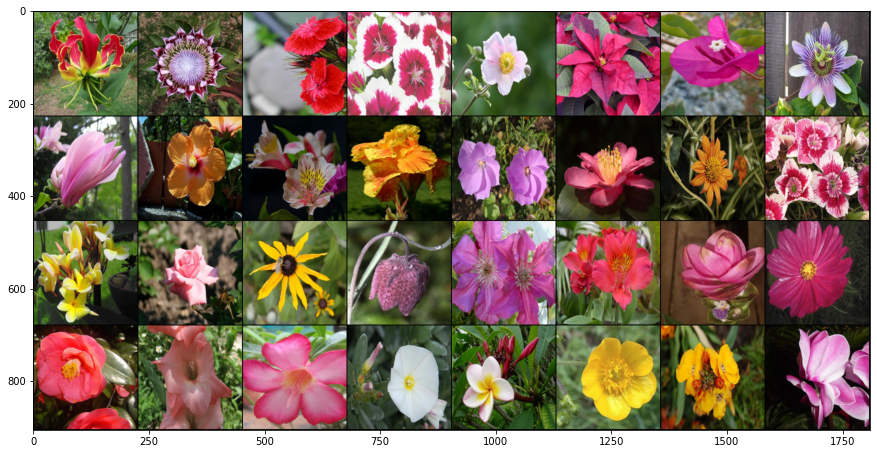

In [87]:
import torch
from flowers import Flowers
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision.transforms import ToTensor, Resize, Compose
import matplotlib.pyplot as plt

## TODO ESTO LO ENTENDEREMOS EN EL LABORATORIO 2!
transforms = Compose([Resize((224, 224)), ToTensor()])
train_ds = Flowers("flowers_dataset/train", transform=transforms)
train_dl = DataLoader(train_ds, batch_size = 32, shuffle=True)
test_ds = Flowers("flowers_dataset/test", transform=transforms)
test_dl = DataLoader(test_ds, batch_size = 1024)

batch, _ = next(iter(train_dl))

plt.figure(figsize=(15,30))
foto = make_grid(batch, nrow=8).permute(1,2,0)

r = plt.imshow(foto)

Vamos a ocupar la red MiAlexNet que definimos en la actividad 1 para enfrentar este problema. Dado que esto puede tomar un buen tiempo, nosotros ya entrenamos sus pesos. El cómo lo hicimos, lo veremos en detalle en el laboratorio de la próxima semana.

#### A. Probemos el modelo sin entrenar

In [88]:
# Ariel: Copio esta clase acá debido a que modifiqué la otra
class MiAlexNetOriginal(nn.Module):
    def __init__(self):
        super(MiAlexNetOriginal, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=3,
                out_channels=96,
                kernel_size=(11, 11),
                stride=(4, 4),
                padding=(2, 2)),
            nn.MaxPool2d(kernel_size=(3, 3), stride=(2, 2)),
            nn.ReLU()
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=96,
                out_channels=256,
                kernel_size=(5, 5),
                stride=(1, 1),
                padding=(2, 2)),
            nn.MaxPool2d(kernel_size=(3, 3), stride=(2, 2)),
            nn.ReLU()
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(
                in_channels=256,
                out_channels=384,
                kernel_size=(3, 3),
                stride=(1, 1),
                padding=(1, 1)),
            nn.ReLU()
        )

        self.conv4 = nn.Sequential(
            nn.Conv2d(
                in_channels=384,
                out_channels=384,
                kernel_size=(3, 3),
                stride=(1, 1),
                padding=(1, 1)),
            nn.ReLU()
        )

        self.conv5 = nn.Sequential(
            nn.Conv2d(
                in_channels=384,
                out_channels=256,
                kernel_size=(3, 3),
                stride=(1, 1),
                padding=(1, 1)),
            nn.MaxPool2d(kernel_size=(3, 3), stride=(2, 2)),
            nn.ReLU()
        )

        self.flat = nn.Flatten()

        self.fc6 = nn.Sequential(
            nn.Linear(9216, 4096),
            nn.ReLU()
        )

        self.fc7 = nn.Sequential(
            nn.Linear(4096, 4096),
            nn.ReLU()
        )

        self.fc8 = nn.Sequential(
            nn.Linear(4096, 102)
        )

    def forward(self, x):

        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.flat(x)
        x = self.fc6(x)
        x = self.fc7(x)
        x = self.fc8(x)

        return x


modelo = MiAlexNetOriginal().cuda()


Vamos a pasar todas las imágenes de test del dataset por nuestro modelo entrenado y vamos a calcular el accuracy del modelo. Esto es la cantidad de respuestas correctas sobre el total de imágenes probadas.

In [89]:
from test_model import test_model
test_model(modelo, test_dl)

Correctas: 51.0 Total: 1738.0 Accuracy: 2.93%

Anda mal, ¿verdad? Alrededor del 1% de exactitud en una tarea con 102 clases es básicamente apuntarle al azar. Probemos ahora con un modelo preentrenado.

#### B. Carguemos los pesos preentrenados en nuestro modelo

In [90]:
pesos = torch.load("alexnet.pth")       # Carga los pesos a una variable
modelo.load_state_dict(pesos)           # Carga los pesos al modelo

<All keys matched successfully>

#### C. Evaluemos el modelo entrenado

Vamos a pasar todas las imágenes de test del dataset por nuestro modelo entrenado y vamos a calcular el ***accuracy*** del modelo. Esto es la cantidad de respuestas correctas sobre el total de imágenes probadas.

In [91]:
test_model(modelo, test_dl)

Correctas: 696.0 Total: 1738.0 Accuracy: 40.05%

¡El modelo obtiene alrededor de un 40% de accuracy en el set de test! ¡Bastante mejor que adivinar al azar!